# **Exercice 2 : classification d’images en utilisant le dataset FashionMNIST**

In [289]:
#!pip install seaborn scikit-learn

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [02:26<00:00, 493kB/s]

Extracting files...


Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


## **I. Exploration du jeu de données**

In [3]:
# chargement via Keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la reproductibilité
tf.random.set_seed(42)

# Chargement du dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

#### **Dimensions et types**

In [6]:
print("Dimensions du train set :", X_train. shape)
print("Dimensions du test set :", X_test.shape)

Dimensions du train set : (60000, 28, 28)
Dimensions du test set : (10000, 28, 28)


#### **Visualisation d’exemples**

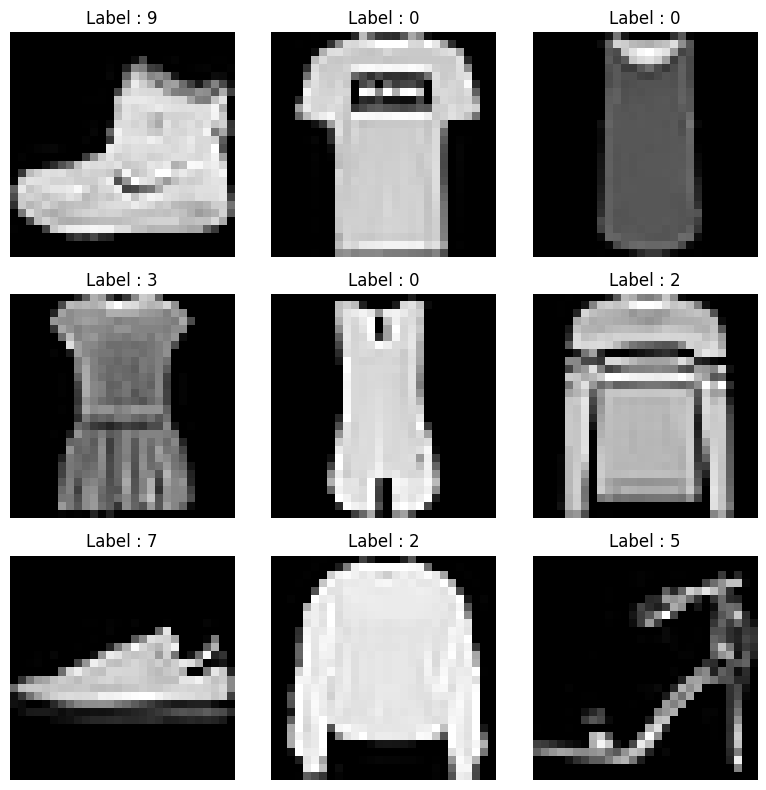

In [9]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i +1)
    plt.imshow(X_train[i], cmap='gray' )
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')
plt.tight_layout()

**Que remarquez-vous sur la nature des données et la taille des images ?**

fashion_mnist.load_data() charge directement deux ensembles : 
- X_train, y_train : 60 000 images d’entraînement
- X_test, y_test : 10 000 images de test

Chaque image est un article vestimentaire (pantalon, pull, chaussure, sac…), et chaque y correspond à un label entre 0 et 9 représentant une classe vestimentaire.

X_train est une matrice de taille (28, 28), donc :
- 28 pixels de hauteur
- 28 pixels de largeur
- 1 seule couche de couleur (niveaux de gris)


Les pixels sont des entiers entre 0 et 255 (uint8). Chaque valeur indique l’intensité lumineuse du pixel : 0 → noir , 255 → blanc


## **II. Prétraitement des données**

In [11]:
from tensorflow.keras.utils import to_categorical

# Normalisation des pixels entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encodage one-hot des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

**1. Pourquoi faut-il normaliser les images ?**

On normalisera généralement les images en les divisant par 255.0 pour les ramener entre 0 et 1, afin de faciliter et accélérer l’apprentissage du réseau.

**2. Quelle est l’importance du one-hot encoding dans un problème de classification
multiclasse ?**

Dans le dataset, les étiquettes (y_train) sont des valeurs entières de 0 à 9, Mais un réseau de neurones ne comprend pas la notion “catégorie 0, 1, 2…” comme des classes distinctes, il pourrait croire que la classe 9 > classe 1 (comme des valeurs numériques), ce qui n’a aucun sens pour un problème de classification.

Le One-Hot Encoding transforme chaque label en un vecteur binaire où :
- la position correspondant à la classe vraie vaut 1,
- toutes les autres positions valent 0.
exp: y_train[0] = 9 alors : y_train_cat[0] = [0,0,0,0,0,0,0,0,0,1]


## **Création d’un modèle dense (ANN)**

#### **Création du modèle de base :**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28)),           # Le réseau reçoit une martice d’entrée (28×28)
    Flatten(),                       # Transforme l'image 2D (28×28) en un vecteur 1D de 784 pixels
    Dense(128, activation='relu'),   # Couche entièrement connectée de 128 neurones avec la fonction d'activation 'ReLU'
    Dropout(0.2),                    # Pendant l’entraînement, désactive aléatoirement 20 % des neurones pour éviter le sur-apprentissage 
    Dense(64, activation='relu'),    # Une deuxième couche cachée avec 64 neurones
    Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones (car 10 classes de vêtements)
])

model. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


#### **Compilation :**

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- Optimizer='adam' → C’est la méthode utilisée pour ajuster les poids afin de réduire l’erreur.
( Adam = Adaptive Moment Estimation (un dérivé intelligent du gradient descent)

- loss='categorical_crossentropy' → C’est la fonction de perte utilisée pour mesurer à quel point les prédictions du modèle s’éloignent des labels vrais (en one-hot)

#### **Entraînement :**

In [20]:
history = model.fit(
    X_train, y_train_cat, # on entraîne avec les labels one-hot, pas les labels originaux
    epochs=10,            # Le modèle va voir tout le dataset 10 fois.
    batch_size=128,       # Les poids sont mis à jour après chaque lot de 128 images.
    validation_split=0.2  # 20 % des données d’entraînement sont mises de côté pour valider le modèle
)

Epoch 1/10
375/375 [==============================] - 6s 12ms/step - loss: 0.6297 - accuracy: 0.7801 - val_loss: 0.4344 - val_accuracy: 0.8451
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.4298 - accuracy: 0.8441 - val_loss: 0.3817 - val_accuracy: 0.8607
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3852 - accuracy: 0.8597 - val_loss: 0.3641 - val_accuracy: 0.8679
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3571 - accuracy: 0.8692 - val_loss: 0.3498 - val_accuracy: 0.8702
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3425 - accuracy: 0.8750 - val_loss: 0.3441 - val_accuracy: 0.8757
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3259 - accuracy: 0.8802 - val_loss: 0.3311 - val_accuracy: 0.8804
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3142 - accuracy: 0.8840 - val_loss: 0.3236 - val_accuracy: 0.8848


#### **Visualisation**

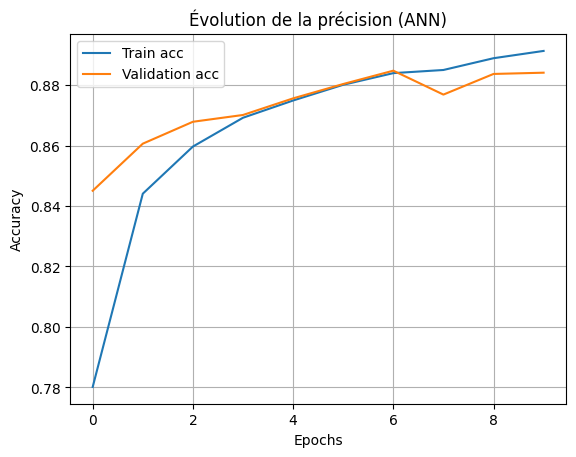

In [22]:
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.legend()
plt.title('Évolution de la précision (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

**1. Pourquoi utilise-t-on la fonction d’activation ReLU ici ?**

- Simple et rapide à calculer → contrairement à sigmoid ou tanh, pas besoin d’exponentielle.
- Évite le problème du gradient qui disparaît (très fréquent avec sigmoid).
- Favorise la sparsité : beaucoup de neurones deviennent inactifs (valeur = 0), ce qui force le réseau à apprendre des motifs utiles.

**2. Quelle est la différence entre accuracy et val_accuracy ?**

- accuracy c'est la précision sur les données d’entraînement (80 %)
- val_accuracy c;est la précision sur les données de validation (20 %) non vues par le modèle

**3. Que se passe-t-il si l’on augmente le nombre d’époques à 50 ?**

On risque de tomber dans le surapprentissage, car le modèle apprend trop bien les données d'entraînement, cela conduit à la mémorisation des données plutôt qu'à la généralisation.

#### **Evaluation finale**

In [25]:
test_loss, test_acc = model. evaluate(X_test, y_test_cat)
print("Precision sur le test set :", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8768
Precision sur le test set : 0.876800000667572


In [27]:
predictions = model.predict(X_test)  

313/313 [==============================] - 1s 3ms/step


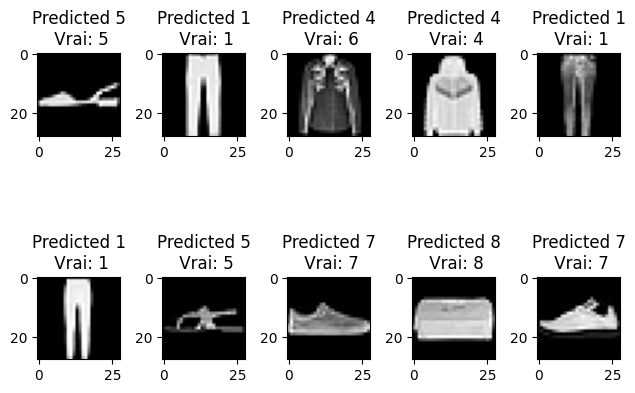

In [99]:
import numpy as np 

for i in range(10):
    index = np.random.randint(0, len(X_test_cnn))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Predicted {np.argmax(predictions[index])}\n Vrai: {y_test[index]}")
plt.tight_layout()

## **IV. Introduction aux Fonctions d’Activation**

Comparons les performances des fonctions : sigmoïde, tanh, ReLU, et LeakyReLU.

- La fonction **sigmoïde** transforme n’importe quelle valeur d’entrée en un nombre compris entre 0 et 1. Elle agit donc comme une “porte d’activation” douce : plus l’entrée est grande, plus la sortie se rapproche de 1 ; plus elle est petite, plus elle se rapproche de 0.
Cette propriété est utile pour modéliser des probabilités ou des décisions binaires (par exemple, “oui” ou “non”).

- La fonction **tanh** est très proche de la sigmoïde, mais elle produit des valeurs comprises entre -1 et 1 au lieu de 0 et 1.
L’avantage est que les données sont centrées autour de zéro, ce qui permet un apprentissage plus stable et plus rapide que la sigmoïde.

- La fonction **ReLU** renvoie x si x > 0, sinon 0. Cela signifie qu’elle laisse passer uniquement les valeurs positives et bloque les négatives.
Ce comportement présente deux grands avantages : elle est rapide à calculer (donc plus efficace) et évite la saturation positive, ce qui permet un apprentissage bien plus stable dans les réseaux profonds.


- La **Leaky ReLU** est une amélioration de la ReLU classique. Plutôt que de mettre les valeurs négatives à zéro, elle leur donne une petite pente (par exemple 0.1x). Ainsi, même lorsque x < 0, le neurone garde une légère activité et continue à apprendre.

In [31]:
from tensorflow.keras.layers import LeakyReLU

activations = ['sigmoid', 'tanh', 'relu' ]
results = {}

for act in activations:
    model_act = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation=act),
    Dense(64, activation=act),
    Dense(10, activation='softmax')
    ])

    model_act.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    h = model_act.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
    results[act] = h.history['val_accuracy'][-1]   # Stocke la dernière précision de validation (val_accuracy) pour chaque activation.


# Leaky ReLU
model_leaky = Sequential([
Input(shape=(28,28)),
Flatten(),
Dense(128),
LeakyReLU(0.1),
Dense(64),
LeakyReLU(0.1),
Dense(10, activation='softmax')
])

model_leaky.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])

h = model_leaky. fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=0)

results['LeakyReLU'] = h.history['val_accuracy' ] [-1]

In [32]:
results

{'sigmoid': 0.8682500123977661,
 'tanh': 0.871999979019165,
 'relu': 0.8778333067893982,
 'LeakyReLU': 0.874666690826416}

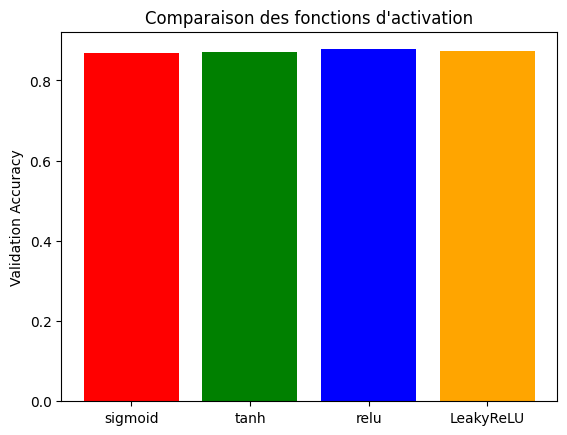

In [33]:
plt.bar(results.keys(), results.values(), color=['red', 'green', 'blue', 'orange'] )
plt.title("Comparaison des fonctions d'activation")
plt.ylabel("Validation Accuracy")
plt.show()

**1. Quelle fonction d’activation donne les meilleurs résultats ?**

Tanh a obtenu la meilleure précision de validation (≈0.872)

**2. Pourquoi les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées ?**

Sigmoïde :
- Sorties entre 0 et 1 → problème de saturation.
- Les gradients deviennent très petits pour des valeurs extrêmes → vanishing gradient.
- Résultat : apprentissage lent, surtout pour les réseaux profonds.

Tanh :
- Sorties entre -1 et 1 → centrée autour de 0, donc un peu mieux que sigmoid.
- Mais encore sujet au vanishing gradient pour valeurs extrêmes.
- Moins efficace pour les réseaux profonds ou les gros datasets.

ReLU / LeakyReLU :
- Pas de saturation pour les valeurs positives.
- Convergence plus rapide.
- ReLU est devenu le standard pour les couches cachées dans la classification d’images

**3. À quoi sert LeakyReLU ?**

Elle évite le problème des **“neurones morts”**

Avec ReLU, certains neurones peuvent rester bloqués à 0 et ne plus jamais apprendre si leurs entrées sont toujours négatives. LeakyReLU permet donc aux neurones négatifs de continuer à recevoir un petit gradient et ainsi à contribuer à l’apprentissage.

#### **Pourquoi Tanh dépasse légèrement ReLU et LeakyReLU ici ?**

- Petit réseau et dataset simple (2 couches cachées seulement)

Sur un petit réseau, les problèmes de vanishing gradient de Tanh ne se manifestent pas fortement. Du coup, Tanh peut capturer efficacement certaines variations des pixels sans saturer les neurones, surtout si les données sont normalisées entre 0 et 1.

- Données centrées autour de 0

Tanh est centrée autour de 0, ce qui aide le modèle à avoir des activations équilibrées (positives et négatives) dans les couches cachées, ce qui facilite l’apprentissage. ReLU ou LeakyReLU ne produisent pas de valeurs négatives, donc certaines subtilités des motifs des images peuvent être moins représentées.

- Stochastique et hasard de l’entraînement
  
Pour seulement 5 époques, la différence est très faible (~0.8718 vs 0.8693). Un petit écart peut simplement venir de la variation due à l’initialisation aléatoire des poids et à la division train/validation.

## **V. Modèle CNN (Convolutional Neural Network)**

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape pour ajouter la dimension "canal"
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

Les CNNs attendent des images avec une dimension “canal”.
- Pour des images en niveaux de gris → 1 canal (28x28x1).
- Pour des images couleur → 3 canaux (28x28x3 pour RGB).

'-1' signifie “tout le reste” → ici, le nombre d’images est conservé.

In [37]:
cnn = Sequential([
    Input(shape=(28, 28, 1)),              # la taille et les canaux des images.
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),                   # réduction de dimension
    Conv2D(64, (3,3), activation='relu'),  # le réseau apprend des motifs plus complexes.
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

Conv2D : 
- applique 32 filtres de taille 3x3 sur l’image. 
- Chaque filtre détecte des motifs locaux (bords, coins, textures…).
- activation='relu' → met à zéro les valeurs négatives pour accélérer l’apprentissage.

Pooling (sous-échantillonnage) 
- réduit la taille spatiale de l’image.
- Ici (2,2) → réduit chaque dimension par 2 → moins de paramètres, moins de calculs.
- Avantages : Réduit le risque de sur-apprentissage, Rend le modèle invariant aux petites translations (décalages)

#### **Entraînement**

In [40]:
history_cnn = cnn.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 63s 165ms/step - loss: 0.6436 - accuracy: 0.7662 - val_loss: 0.4177 - val_accuracy: 0.8524
Epoch 2/10
375/375 [==============================] - 71s 189ms/step - loss: 0.4026 - accuracy: 0.8539 - val_loss: 0.3545 - val_accuracy: 0.8703
Epoch 3/10
375/375 [==============================] - 962s 3s/step - loss: 0.3153 - accuracy: 0.8850 - val_loss: 0.2996 - val_accuracy: 0.8905
Epoch 5/10
375/375 [==============================] - 72s 191ms/step - loss: 0.2892 - accuracy: 0.8933 - val_loss: 0.2970 - val_accuracy: 0.8957
Epoch 6/10
375/375 [==============================] - 75s 201ms/step - loss: 0.2721 - accuracy: 0.9017 - val_loss: 0.2661 - val_accuracy: 0.9028
Epoch 7/10
375/375 [==============================] - 74s 198ms/step - loss: 0.2521 - accuracy: 0.9071 - val_loss: 0.2567 - val_accuracy: 0.9077
Epoch 8/10
375/375 [==============================] - 91s 244ms/step - loss: 0.2378 - accuracy: 0.9133 - val_loss: 0.2811 - val_accu

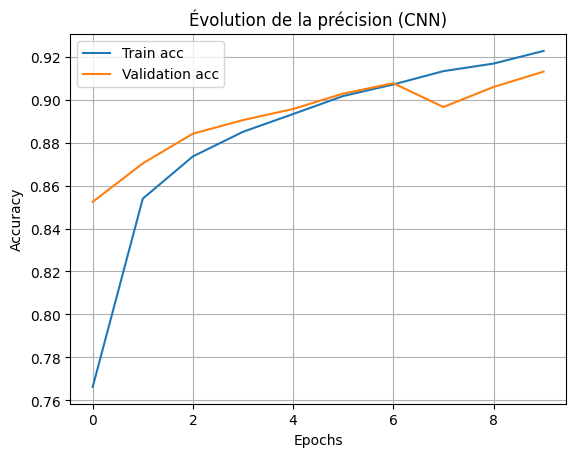

In [41]:
plt.plot(history_cnn.history['accuracy'], label='Train acc')
plt.plot(history_cnn.history['val_accuracy'], label='Validation acc')
plt.legend()
plt.title('Évolution de la précision (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

#### **Évaluation**

In [43]:
test_loss, test_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print("Precision CNN sur test set :", test_acc)

313/313 [==============================] - 9s 30ms/step - loss: 0.2541 - accuracy: 0.9083
Precision CNN sur test set : 0.90829998254776


--> Nous remarquons que la précision d'un CNN (accuracy= 0.9083) est plus élevé que l'ANN classique (accuracy= 0.8768)

**1. Quelle est la différence entre un ANN et un CNN ?**

Un réseau de neurones artificiel classique (ANN) traite une image comme un vecteur aplatit et connecte chaque neurone de façon dense à la couche précédente : il oublie donc la structure spatiale des pixels et nécessite rapidement un grand nombre de paramètres.

À l’inverse, un réseau convolutionnel (CNN) conserve la grille 2D de l’image et utilise des filtres (kernels) qui glissent sur l’image pour détecter des motifs locaux (bords, coins, textures). Grâce au partage de poids et au pooling, le CNN apprend une hiérarchie de caractéristiques (du simple au complexe), est plus économe en paramètres et plus robuste aux translations et variations locales.


**2. Pourquoi le CNN donne-t-il généralement de meilleurs résultats ?**

CNN exploite les motifs locaux et les caractéristiques spatiales dans les images(transformation, rotation, légère distorsion), ce que les ANN classiques ne font pas. De plus qu'il réduit le nombre de paramètres grâce au partage de poids dans les filtres, alors moins de risque de sur-apprentissage.

**3. Quel est le rôle des couches de Pooling ?**

Pooling (ex: MaxPooling) réduit la dimension spatiale des images tout en gardant les informations importantes.

Avantages :
- Réduit le nombre de paramètres et le calcul → accélère l’entraînement.
- Rend le modèle plus robuste aux petites translations et déformations de l’image.
- Permet de résumer les caractéristiques détectées par les filtres convolutionnels.

#### **Visualisation des performances**

313/313 [==============================] - 8s 26ms/step


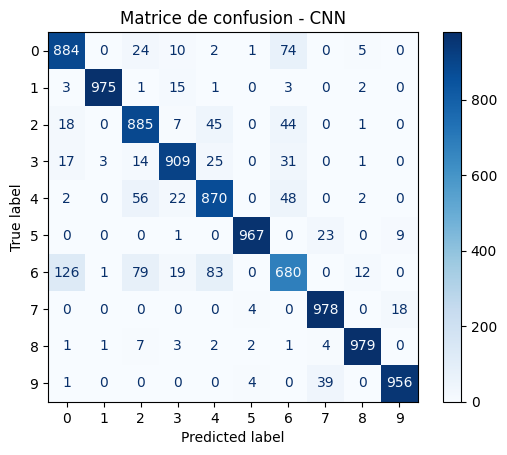

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)
ConfusionMatrixDisplay. from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matrice de confusion - CNN")
plt.show()

**1. Quelles classes sont le plus souvent confondues ?**

- la classe 6 (Chemise) est souvent confudue par la classe 0 (T-shirt / top) et classe 2 (Pull) et classe 4 (Manteau)
- la classe 0 (T-shirt / top) est souvent confudue par la classe 6 (Chemise)

**2. Comment peut-on réduire ces erreurs de classification ?**

On peut augmenter la profondeur du réseau en ajoutant plus de couches convolutionnelles pour apprendre des motifs plus complexes, ou bien essayer un nombre d'epochs plus elevé car peut être le modèle n’a pas encore assez appris.


In [49]:
cnn2 = Sequential([
    Input(shape=(28, 28, 1)),              # la taille et les canaux des images.
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),                   # réduction de dimension
    Conv2D(64, (3,3), activation='relu'),  # le réseau apprend des motifs plus complexes.
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
cnn2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 1152)             

In [50]:
history_cnn2 = cnn2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 95s 247ms/step - loss: 0.6722 - accuracy: 0.7511 - val_loss: 0.4522 - val_accuracy: 0.8331
Epoch 2/10
375/375 [==============================] - 81s 217ms/step - loss: 0.4059 - accuracy: 0.8544 - val_loss: 0.3521 - val_accuracy: 0.8701
Epoch 3/10
375/375 [==============================] - 81s 215ms/step - loss: 0.3419 - accuracy: 0.8754 - val_loss: 0.3129 - val_accuracy: 0.8863
Epoch 4/10
375/375 [==============================] - 83s 222ms/step - loss: 0.3067 - accuracy: 0.8893 - val_loss: 0.3051 - val_accuracy: 0.8917
Epoch 5/10
375/375 [==============================] - 80s 213ms/step - loss: 0.2827 - accuracy: 0.8969 - val_loss: 0.2792 - val_accuracy: 0.8968
Epoch 6/10
375/375 [==============================] - 86s 231ms/step - loss: 0.2616 - accuracy: 0.9051 - val_loss: 0.2764 - val_accuracy: 0.8979
Epoch 7/10
375/375 [==============================] - 89s 238ms/step - loss: 0.2439 - accuracy: 0.9115 - val_loss: 0.2684 - val_ac

In [51]:
test_loss2, test_acc2 = cnn2.evaluate(X_test_cnn, y_test_cat)
print("Precision CNN sur test set :", test_acc2)

313/313 [==============================] - 9s 27ms/step - loss: 0.2542 - accuracy: 0.9086
Precision CNN sur test set : 0.9085999727249146


313/313 [==============================] - 8s 23ms/step


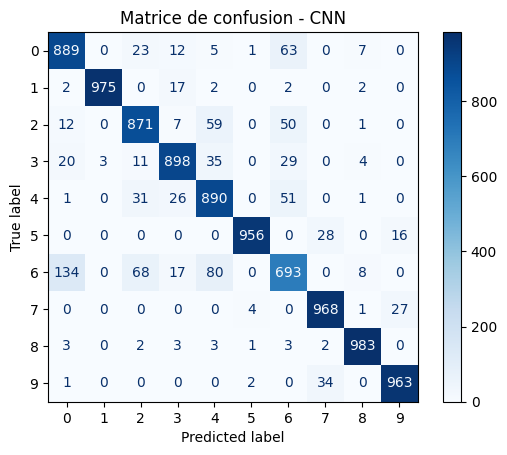

In [52]:
y_pred2 = np.argmax(cnn2.predict(X_test_cnn), axis=1)
ConfusionMatrixDisplay. from_predictions(y_test, y_pred2, cmap="Blues")
plt.title("Matrice de confusion - CNN")
plt.show()

--> Remarquons que le nombre de prédictions incorrectes a diminué dans de nombreux classes

#### **Data Augmentation**

Data Augmentation sert à générer artificiellement de nouvelles images d’entraînement à partir des images originales,
en les transformant légèrement (rotation, zoom, symétrie horizontale, etc.).

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augtmente le nombre des images pou CNN
datagen = ImageDataGenerator(
    rotation_range=10,       # Fait tourner les images aléatoirement jusqu’à ±10°
    zoom_range=0.1,          # Zoom avant ou arrière de 10 %
    horizontal_flip=True     # Retourne horizontalement certaines images
)

Ces transformations gardent le sens de l’image, mais modifient légèrement sa forme, pour apprendre au modèle à reconnaître les objets même s’ils sont déplacés, tournés ou déformés.

In [56]:
import scipy
from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train_cnn, y_train_cat, test_size=0.2, random_state=42
)

datagen.fit(X_train_part)

In [57]:
cnn.fit(
    datagen.flow(X_train_part, y_train_part, batch_size=128),
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
375/375 [==============================] - 105s 276ms/step - loss: 0.3823 - accuracy: 0.8625 - val_loss: 0.2356 - val_accuracy: 0.9116
Epoch 2/10
375/375 [==============================] - 97s 257ms/step - loss: 0.3237 - accuracy: 0.8806 - val_loss: 0.2374 - val_accuracy: 0.9122
Epoch 3/10
375/375 [==============================] - 94s 250ms/step - loss: 0.3021 - accuracy: 0.8902 - val_loss: 0.2244 - val_accuracy: 0.9182
Epoch 4/10
375/375 [==============================] - 99s 263ms/step - loss: 0.2940 - accuracy: 0.8902 - val_loss: 0.2186 - val_accuracy: 0.9197
Epoch 5/10
375/375 [==============================] - 98s 261ms/step - loss: 0.2808 - accuracy: 0.8969 - val_loss: 0.2166 - val_accuracy: 0.9211
Epoch 6/10
375/375 [==============================] - 103s 274ms/step - loss: 0.2732 - accuracy: 0.8994 - val_loss: 0.2228 - val_accuracy: 0.9190
Epoch 7/10
375/375 [==============================] - 99s 265ms/step - loss: 0.2689 - accuracy: 0.9015 - val_loss: 0.2318 - val_

In [81]:
test_loss_aug, test_acc_aug = cnn.evaluate(X_test_cnn, y_test_cat)

313/313 [==============================] - 4s 12ms/step - loss: 0.2477 - accuracy: 0.9113


**1. Quel est l’intérêt de la Data Augmentation ?**

Le but c'est d'empêcher le surapprentissage (overfitting) et améliorer la généralisation du modèle CNN.

- Sans augmentation : le modèle voit toujours les mêmes images, dans la même orientation et position, il risque de mémoriser les données (overfitting), donc il ne généralise pas bien sur de nouvelles images.
- Avec augmentation : chaque époque, il voit des variantes différentes d’une même image, il apprend à reconnaître le concept du vêtement, pas seulement sa position ou son angle précis.
  
**2. Quels types de transformations semblent les plus efficaces pour ce dataset ?**

- horizontal_flip : utile pour objets symétriques (ex : chaussures)
- rotation_range : Simule des vêtements légèrement inclinés
- width/heigh_shift_range : Rend le modèle robuste à la position dans l’image

313/313 [==============================] - 2s 7ms/step


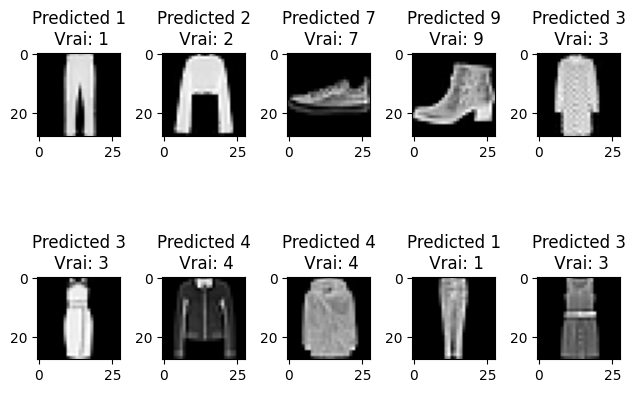

In [101]:
predictions = cnn.predict(X_test_cnn)

for i in range(10):
    index = np.random.randint(0, len(X_test_cnn))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test_cnn[index], cmap='gray')
    plt.title(f"Predicted {np.argmax(predictions[index])}\n Vrai: {y_test[index]}")
plt.tight_layout()